<a href="https://colab.research.google.com/github/vinayshanbhag/math/blob/master/Univariate_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Univariate Linear Regression

The goal of univariate linear regression is to model the relationship between a single explanatory variable *x* and continuous valued target (response variable) *y*

In [585]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [586]:
x = np.linspace(1,10,20)
m = np.random.uniform(0.2,0.25, len(x))
c = np.random.uniform(-0.3,-0.1, len(x))
y = m*x + c

In [587]:
def error(x,y, w0,w1):
  z = w0+w1*x
  return np.mean((y-z)**2)

def plot(x,y,w0=None, w1=None, title=""):
  plt.scatter(x, y,marker='o');
  plt.xlabel("X");
  plt.ylabel("Y");
  
  plt.grid();
  if w0!=None and w1!=None:
    z = w1*x+w0
    plt.plot(x, z,'g')
    title += f" MSE:{error(x,y,w0,w1):0.3f}"
    plt.vlines(x,y,z,colors='r',linestyles='dotted')
  plt.title(title)

Say we have a set of data points like this. The goal of univariate linear regression is to find the best fitting line, given these data points. 

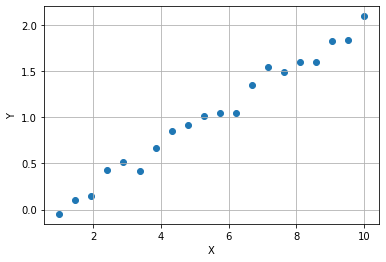

In [588]:
plot(x,y)

The linear model can be described by

$z_i = w_0 + w_1x_i$

where $w_0$ is the y intercept, and $w_1$ is the slope


Considering an arbitrary line as shown below, we can compute the error (red lines) between actual data and predicted values.

The squared error for each data point $i$ is given by 

SE = $(y_i-z_i)^2$

The mean squared error is given by 

$MSE = \frac{\displaystyle\sum_{i=1}^{n} (y_i-z_i)^2}{n}$ 

where $n$ is the number of samples in the dataset.

$MSE = \frac{\displaystyle\sum_{i=1}^{n} (y_i- w_0 - w_1x)^2}{n}$ 



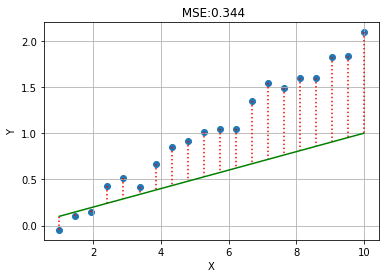

In [595]:
plot(x, y, 0.0,0.1)

To find the best fitting line, we would have to minimize this error. So the objective or cost function is given by

$J(w_0,w_1) = \frac{1}{2}MSE$

$\therefore J(w_0,w_1) = \frac{1}{2n}\displaystyle\sum_{i=1}^{n} (y_i- w_0 - w_1x)^2$

The $\frac{1}{2}$ is for mathematical simplicity, so that it cancels out when we take the derivative.

Steps
1. Initialize $w_0$ and $w_1$ to random values
2. Compute z
3. Compute J
4. Compute $\frac{\partial J}{\partial w_1}$
5. Compute $\frac{\partial J}{\partial w_0}$
6. Update weights $w_0$ and $w_1$
7. Go back to step 2 and iterate till convergence 



Partial derivative of the cost function $J$ w.r.t. $z_1$ is given by-

$\frac{\partial J}{\partial z_1} = \frac{1}{2n}[(y_1 - z_1)^2 + (y_2 - z_2)^2 + ...+(y_n - z_n)^2]$

Since everything but the first term is a constant w.r.t. $z_1$ -

$\frac{\partial J}{\partial z_1} = \frac{2}{2n}(y_1 - z_1)$

$\frac{\partial J}{\partial z_1} = \frac{(y_1 - z_1)}{n}$

In general -

$\frac{\partial J}{\partial z_i} = \frac{(y_i-z_i)}{n}$

Partial derivative of $z_1$ w.r.t $w_1$

$\frac{\partial z_1}{\partial w_1} = \frac{\partial}{\partial w_1}(w_1 x_1 + w_0)$

$\frac{\partial z_1}{\partial w_1} = x_1$

In general

$\frac{\partial z_i}{\partial w_1} = x_i$

Partial derivative of $z_1$ w.r.t $w_0$

$\frac{\partial z_1}{\partial w_0} = \frac{\partial}{\partial w_0}(w_1 x_1 + w_0)$

In general

$\frac{\partial z_i}{\partial w_0} = 1$

Partial derivative of $J$ w.r.t. $w_1$

$\frac{\partial J}{\partial w_1} = \displaystyle\sum_{i=1}^{n} \frac{\partial J}{\partial z_i} \frac{\partial z_i}{\partial w_1} $

$\frac{\partial J}{\partial w_1} = \displaystyle\sum_{i=1}^{n}\frac{(y_i-z_i)}{n} x_i $


Partial derivative of $J$ w.r.t $w_0$

$\frac{\partial J}{\partial w_0} = \displaystyle\sum_{i=1}^{n}\frac{\partial J}{\partial z_i} \frac{\partial z_i}{\partial w_0} $

$\frac{\partial J}{\partial w_0} = \displaystyle\sum_{i=1}^{n}\frac{(y_i-z_i)}{n} 1$

Compute new weights $w_0$ and $w_1$

$w_{0_{new}} = w_0 - \alpha \frac{\partial J}{\partial w_0}$

$w_{1_{new}} = w_1 - \alpha \frac{\partial J}{\partial w_1}$

where $\alpha$ is the learning rate


In [596]:
w0, w1 = np.zeros(2)
n = len(y)
alpha = 0.02
tgt_mse = 0.01
hist = {"dJdw0":[],"dJdw1":[],"w0":[], "w1":[],"mse":[]}
for i in range(1000):
  z = w0+w1*x
  mse = error(x, y, w0, w1)
  dJdw0 = np.sum((z-y)/n)
  dJdw1 = np.sum(((z-y)*x)/n)
  w0_ = w0-alpha*dJdw0 
  w1_ = w1-alpha*dJdw1
  mse_ = error(x,y, w0_, w1_) 
  
  hist["dJdw0"].append(dJdw0)
  hist["dJdw1"].append(dJdw1)
  hist["w0"].append(w0)
  hist["w1"].append(w1)
  hist["mse"].append(mse)
  
  if mse<=tgt_mse:
    print(f"Converged after {i+1} steps")
    break
  else:
    w0,w1=(w0_,w1_)

Converged after 142 steps


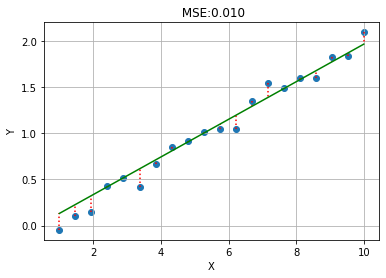

In [597]:
plot(x,y, w0, w1)

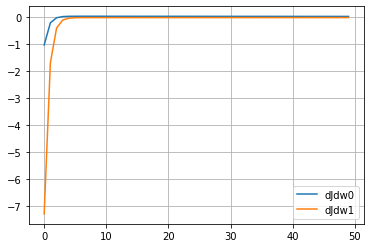

In [598]:
plt.plot(hist["dJdw0"][:50], label="dJdw0")
plt.plot(hist["dJdw1"][:50], label="dJdw1")
plt.grid();
plt.legend();

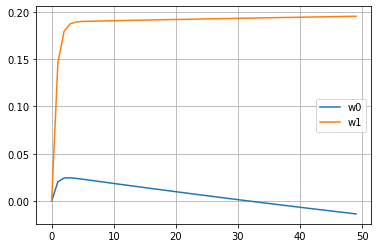

In [599]:
plt.plot(hist["w0"][:50], label="w0")
plt.plot(hist["w1"][:50], label="w1")
plt.grid()
plt.legend();

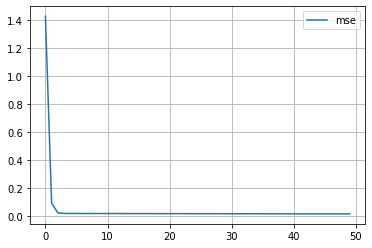

In [600]:
plt.plot(hist["mse"][:50], label="mse");
plt.grid()
plt.legend();